In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [3]:
weather <- read_csv("https://raw.githubusercontent.com/DylanqrH/rain/main/weatherAUS.csv", guess_max = 10000)
weather

Parsed with column specification:
cols(
  .default = col_double(),
  Date = col_date(format = ""),
  Location = col_character(),
  WindGustDir = col_character(),
  WindDir9am = col_character(),
  WindDir3pm = col_character(),
  RainToday = col_character(),
  RainTomorrow = col_character()
)

See spec(...) for full column specifications.



Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,⋯,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
<date>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
2008-12-01,Albury,13.4,22.9,0.6,NA,NA,W,44,W,⋯,71,22,1007.7,1007.1,8,NA,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NA,NA,WNW,44,NNW,⋯,44,25,1010.6,1007.8,NA,NA,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NA,NA,WSW,46,W,⋯,38,30,1007.6,1008.7,NA,2,21.0,23.2,No,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
2017-06-23,Uluru,5.4,26.9,0,NA,NA,N,37,SE,⋯,53,24,1021.0,1016.8,NA,NA,12.5,26.1,No,No
2017-06-24,Uluru,7.8,27.0,0,NA,NA,SE,28,SSE,⋯,51,24,1019.4,1016.5,3,2,15.1,26.0,No,No
2017-06-25,Uluru,14.9,NA,0,NA,NA,NA,NA,ESE,⋯,62,36,1020.2,1017.9,8,8,15.0,20.9,No,NA


In [4]:
weather_Darwin <- weather %>%
                  filter(Location == "Darwin") %>%
                  select(Evaporation, Sunshine, WindSpeed9am, Humidity3pm, Pressure3pm, Rainfall, MinTemp, MaxTemp, RainTomorrow) %>%
                  mutate(RainTomorrow = as.factor(RainTomorrow)) %>%
                  drop_na()
weather_Darwin

Evaporation,Sunshine,WindSpeed9am,Humidity3pm,Pressure3pm,Rainfall,MinTemp,MaxTemp,RainTomorrow
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4.4,11.0,13,32,1012.1,0,20.0,33.1,No
6.0,10.4,15,17,1012.4,0,19.4,32.4,No
8.0,11.0,22,24,1013.0,0,18.2,31.8,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
5.6,11.0,17,23,1011.8,0,20.7,32.8,No
6.2,10.6,9,58,1010.7,0,19.5,31.8,No
5.6,10.7,15,32,1009.7,0,20.2,31.7,No


In [5]:
set.seed(999)
weather_split <- initial_split(weather_Darwin, prop = 0.75, strata = RainTomorrow)  
weather_train <- training(weather_split)   
weather_test <- testing(weather_split)
head(weather_train)

Evaporation,Sunshine,WindSpeed9am,Humidity3pm,Pressure3pm,Rainfall,MinTemp,MaxTemp,RainTomorrow
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4.4,11.0,13,32,1012.1,0,20.0,33.1,No
8.0,11.0,22,24,1013.0,0,18.2,31.8,No
7.0,10.4,22,16,1013.6,0,17.3,30.7,No
7.0,10.8,20,16,1012.6,0,15.5,30.8,No
9.2,10.6,20,12,1014.6,0,19.6,30.8,No
9.6,10.6,31,15,1015.2,0,17.3,29.2,No


In [11]:
weather_max <- weather_train %>%
       select(Evaporation:MaxTemp) %>%
       map_dfr(max)
weather_min <- weather_train %>%
       select(Evaporation:MaxTemp) %>%
       map_dfr(min)
weather_mean <- weather_train %>%
       select(Evaporation:MaxTemp) %>%
       map_dfr(mean)
weather_median <- weather_train %>%
       select(Evaporation:MaxTemp) %>%
       map_dfr(median)
bind <- rbind(weather_max, weather_min, weather_mean,weather_median)
Parameter <- c("max","min","mean","median")
cbind(Parameter,  bind)

Parameter,Evaporation,Sunshine,WindSpeed9am,Humidity3pm,Pressure3pm,Rainfall,MinTemp,MaxTemp
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
max,16.200000,12.300000,46.00000,99.00000,1015.400,129.400000,29.70000,38.00000
min,0.200000,0.000000,0.00000,5.00000,996.000,0.000000,12.50000,21.90000
mean,6.340783,8.575181,14.96722,51.69051,1008.421,3.887782,23.22009,32.58825
median,6.400000,10.000000,15.00000,53.00000,1008.700,0.000000,23.90000,32.80000


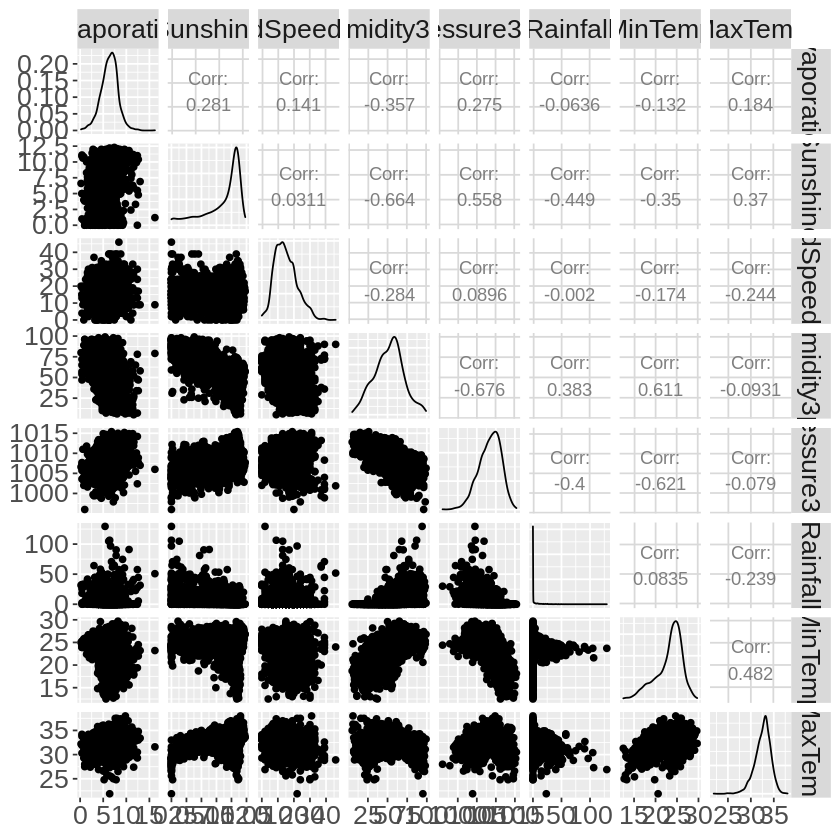

In [12]:
Predictors <- weather_train %>%
              select(-RainTomorrow)
Weather_paired <- Predictors %>%
        ggpairs() + 
        theme(text = element_text(size = 20))
Weather_paired

In [7]:
set.seed(1234)
options(rear.plot.width = 10, repr.plot.width = 10)

weather_recipe <- recipe(RainTomorrow ~ ., 
                              data = weather_train, na.rm = TRUE) %>%
                        step_scale(all_predictors()) %>%
                        step_center(all_predictors())
weather_vfold <- vfold_cv(weather_train, v = 5, strata = RainTomorrow)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")
k_vals <- tibble(neighbors = seq(from = 1, to = 55, by = 5))
knn_result <- workflow() %>%
       add_recipe(weather_recipe) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = weather_vfold, grid = k_vals) %>%
       collect_metrics() 

accuracies <- knn_result %>% 
       filter(.metric == "accuracy")

k_vals
accuracies

In [ ]:
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       geom_vline(xintercept = 26,linetype = "dashed", size = 0.5) +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 200, by = 5)) + 
       scale_y_continuous(limits = c(0.75, 0.9)) +
       ggtitle("Figure 1: Predicting Best k Value") +
       theme(text = element_text(size = 18), plot.title = element_text(hjust = 0.5))

cross_val_plot

In [ ]:
weather_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 26) %>%
       set_engine("kknn") %>%
       set_mode("classification")

weather_fit <- workflow() %>%
          add_recipe(weather_recipe) %>%
          add_model(weather_spec) %>%
          fit(data = weather_train)

weather_fit

In [ ]:
weather_all_predicted <- predict(weather_fit, weather_test) %>%
                         bind_cols(weather_test)
weather_metrics <- weather_all_predicted %>%
         metrics(truth = RainTomorrow, estimate = .pred_class)
weather_metrics

In [29]:
weather_conf_mat <- weather_all_predicted %>%
                    conf_mat(truth = RainTomorrow, estimate = .pred_class)
weather_conf_mat

          Truth
Prediction  No Yes
       No  528  75
       Yes  50 130